In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate  # Import tabulate for tabular display

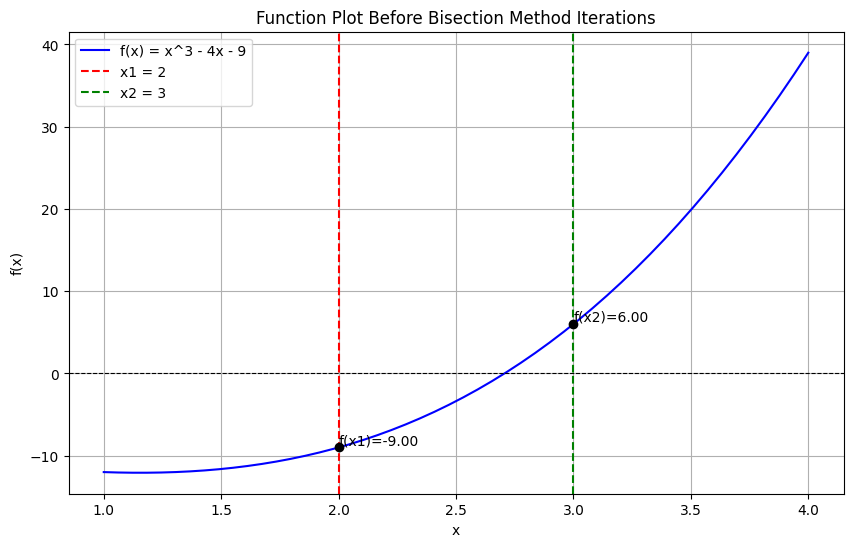

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**3 - 4*x - 9

# Initial interval for bisection method
x1, x2 = 2, 3  # Example interval

# Generate values for plotting
x_vals = np.linspace(x1 - 1, x2 + 1, 50)  # A range slightly wider than the interval
y_vals = f(x_vals)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x) = x^3 - 4x - 9", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)  # x-axis
plt.axvline(x1, color="red", linestyle="--", label=f"x1 = {x1}")  # Mark x1
plt.axvline(x2, color="green", linestyle="--", label=f"x2 = {x2}")  # Mark x2

# Highlight points at x1 and x2
plt.scatter([x1, x2], [f(x1), f(x2)], color="black", zorder=5)
plt.text(x1, f(x1), f"f(x1)={f(x1):.2f}", verticalalignment='bottom')
plt.text(x2, f(x2), f"f(x2)={f(x2):.2f}", verticalalignment='bottom')

# Title and labels
plt.title("Function Plot Before Bisection Method Iterations")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [3]:
# Bisection method implementation
def bisection_method(f, x1, x2, tol=1e-5, max_iter=50):
    iterations = []
    prev_m = None  # To store the previous midpoint for error calculation

    for n in range(max_iter):
        m = (x1 + x2) / 2  # Midpoint
        f_m = f(m)
        are = (abs((m - prev_m) / m) * 100) if prev_m is not None else None  # Absolute relative error

        # Store iteration data
        iterations.append([n + 1, x1, x2, m, f_m, x2 - x1, are])

        # Check convergence criteria
        if abs(f_m) < tol or (x2 - x1) / 2 < tol:
            break

        # Update interval based on the sign of f(m)
        if f(x1) * f_m < 0:
            x2 = m
        else:
            x1 = m

        prev_m = m  # Update previous midpoint

    return iterations

In [4]:
# Define the function
def f(x):
    return x**3 - 4*x - 9


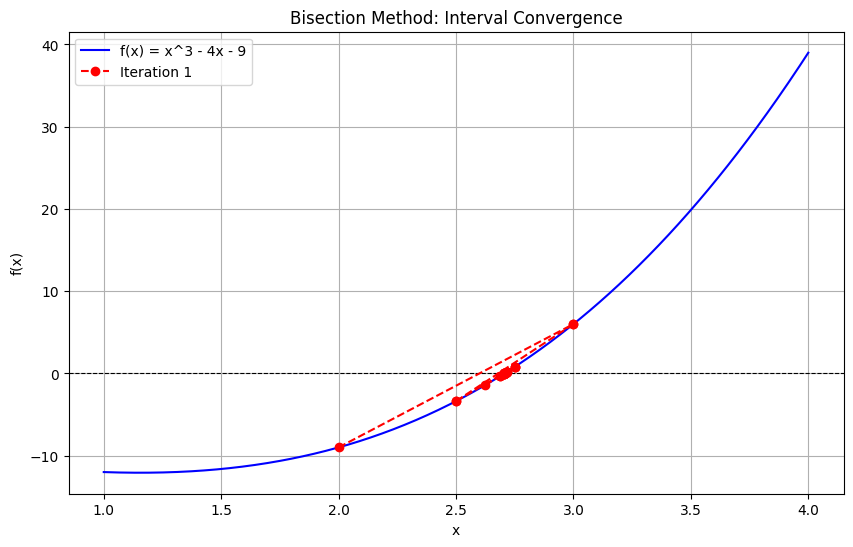

+-------------+---------+---------+---------+--------------+------------------+-------------------------------+
|   Iteration |      x1 |      x2 |       m |         f(m) |   Interval Width |   Absolute Relative Error (%) |
+=============+=========+=========+=========+==============+==================+===============================+
|           1 | 2       | 3       | 2.5     | -3.375       |      1           |                 nan           |
+-------------+---------+---------+---------+--------------+------------------+-------------------------------+
|           2 | 2.5     | 3       | 2.75    |  0.796875    |      0.5         |                   9.09091     |
+-------------+---------+---------+---------+--------------+------------------+-------------------------------+
|           3 | 2.5     | 2.75    | 2.625   | -1.41211     |      0.25        |                   4.7619      |
+-------------+---------+---------+---------+--------------+------------------+-------------------------

In [5]:

# Initial guesses and tolerance
x1, x2 = 2, 3  # Example interval where the root is known to exist
tol = 1e-5

# Perform bisection method
results = bisection_method(f, x1, x2, tol)

# Convert results to a DataFrame for tabular display
columns = ["Iteration", "x1", "x2", "m", "f(m)", "Interval Width", "Absolute Relative Error (%)"]
df_results = pd.DataFrame(results, columns=columns)

# Plotting the function and the intervals
x_vals = np.linspace(x1 - 1, x2 + 1, 500)
y_vals = f(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label="f(x) = x^3 - 4x - 9", color="blue")
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  # x-axis

# Plot intervals for each iteration
for i, row in df_results.iterrows():
    plt.plot([row["x1"], row["x2"]], [f(row["x1"]), f(row["x2"])], 'ro--', label=f"Iteration {int(row['Iteration'])}" if i == 0 else "")

plt.title("Bisection Method: Interval Convergence")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

# Display the tabular results with borders using tabulate
print(tabulate(df_results, headers="keys", tablefmt="grid", showindex=False))